In [1]:
import os
import cv2
import warnings
import hashlib
import imagehash

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path
from PIL import Image
from itertools import combinations

os.chdir('../')
warnings.filterwarnings('ignore')

In [2]:
files=[str(p) for p in Path('data/raw').iterdir() if p.is_file()]

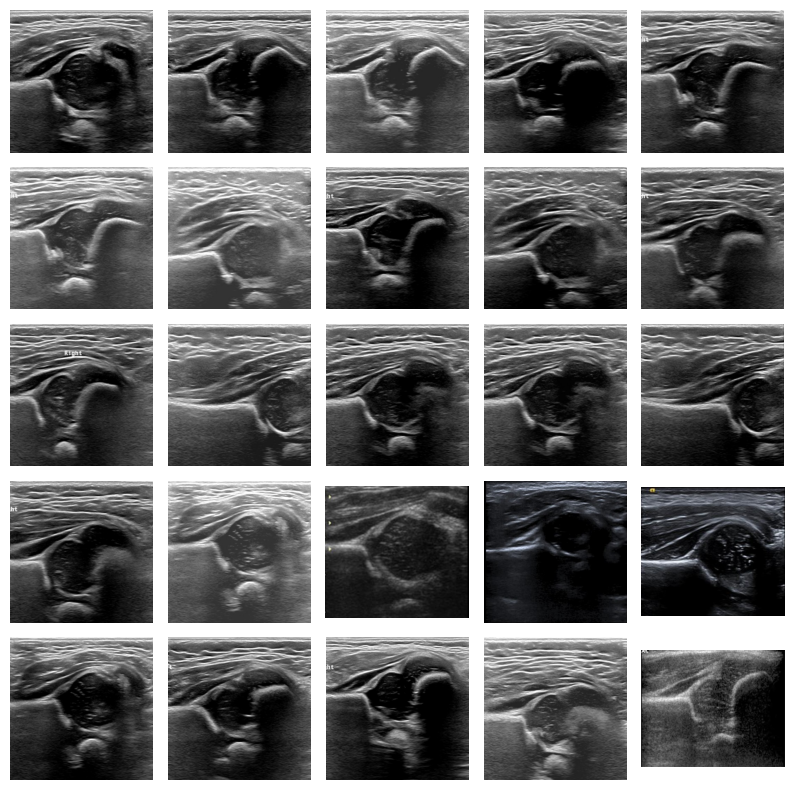

In [8]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(files[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [9]:
metadata = []

for path in files:
    with Image.open(path) as img:
        with open(path, 'rb') as f:
            perceptual_hash = str(imagehash.phash(img))
        
        info = {
            'filename': os.path.basename(path),
            'mode': img.mode,
            'width': img.width,
            'height': img.height,
            'size': os.path.getsize(path),
            'bit_depth': img.bits if hasattr(img, 'bits') else None,
            'phash': perceptual_hash
        }
        metadata.append(info)

In [10]:
meta = pd.DataFrame(metadata)
meta.to_csv('data/annot/meta.csv')